In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import statsmodels.api
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')


RendererRegistry.enable('notebook')

In [45]:
df = pd.read_csv("sample_data (1).csv")
df

date  hour  users   sessionLength  event_count
0     2019-01-02     0     45             282           52
1     2019-01-02     1     62             254           67
2     2019-01-02     2     97             213          109
3     2019-01-02     3    147             215          152
4     2019-01-02     4    172             232          185
5     2019-01-02     5    193             236          210
6     2019-01-02     6    201             226          221
7     2019-01-02     7    237             203          253
8     2019-01-02     8    257             216          274
9     2019-01-02     9    250             247          279
10    2019-01-02    10    270             237          290
11    2019-01-02    11    212             225          249
12    2019-01-02    12    239             211          260
13    2019-01-02    13    212             224          235
14    2019-01-02    14    193             251          205
15    2019-01-02    15    151             242          165
16    2019-01-02    16    132             247          138
17    2019-01-02    17     99             269          106
18    2019-01-02    18     60             341           64
19    2019-01-02    19     37             314           37
20    2019-01-02    20     46             250           47
21    2019-01-02    21     25             216           25
22    2019-01-02    22     21             417           22
23    2019-01-02    23     25             132           27
24    2019-01-03     0     40             148           43
25    2019-01-03     1     86             239           93
26    2019-01-03     2    124             195          132
27    2019-01-03     3    207             221          226
28    2019-01-03     4    197             203          217
29    2019-01-03     5    203             220          223
...          ...   ...    ...             ...          ...
4290  2019-06-29    18    140             193          153
4291  2019-06-29    19     61             261           66
4292  2019-06-29    20     47             202           49
4293  2019-06-29    21     35             356           35
4294  2019-06-29    22     35             235           38
4295  2019-06-29    23     58             401           61
4296  2019-06-30     0    132             246          138
4297  2019-06-30     1    165             303          175
4298  2019-06-30     2    258             250          276
4299  2019-06-30     3    253             233          280
4300  2019-06-30     4    281             235          306
4301  2019-06-30     5    264             300          288
4302  2019-06-30     6    372             250          387
4303  2019-06-30     7    363             201          389
4304  2019-06-30     8    322             210          343
4305  2019-06-30     9    323             183          351
4306  2019-06-30    10    411             226          439
4307  2019-06-30    11    384             186          418
4308  2019-06-30    12    381             220          426
4309  2019-06-30    13    384             239          411
4310  2019-06-30    14    446             231          500
4311  2019-06-30    15    354             212          391
4312  2019-06-30    16    287             224          337
4313  2019-06-30    17    263             249          298
4314  2019-06-30    18    144             236          150
4315  2019-06-30    19     87             239           93
4316  2019-06-30    20     42             339           49
4317  2019-06-30    21     34             320           37
4318  2019-06-30    22     42             238           47
4319  2019-06-30    23     58             134           61

[4320 rows x 5 columns]

In [3]:
# str(df["date"][0])
for i in range(df.shape[0]):
    if(i%24<10):
        st=str(df["date"][i])+'T'+'0'+str(i%24)
    else:
        st=str(df["date"][i])+'T'+str(i%24)
    df["date"][i]=pd.Timestamp(st)

In [4]:
print(df["date"][2])
df.isnull().sum()

2019-01-02 02:00:00


date              0
hour              0
users             0
 sessionLength    0
event_count       0
dtype: int64

In [5]:
df['date']=pd.to_datetime(df['date'])
df.dtypes

date              datetime64[ns]
hour                       int64
users                      int64
 sessionLength             int64
event_count                int64
dtype: object

In [6]:
def positive_average(num):
    return num[num>-200].mean()
daily_data=df.groupby("date").apply(positive_average)
daily_data.head()

hour  users   sessionLength  event_count
date                                                         
2019-01-02 00:00:00   0.0   45.0           282.0         52.0
2019-01-02 01:00:00   1.0   62.0           254.0         67.0
2019-01-02 02:00:00   2.0   97.0           213.0        109.0
2019-01-02 03:00:00   3.0  147.0           215.0        152.0
2019-01-02 04:00:00   4.0  172.0           232.0        185.0

In [7]:
daily_data.isnull().sum()

hour               0
users              0
 sessionLength    34
event_count        0
dtype: int64

In [8]:
week_data=df.resample('W-Mon', on='date').sum().reset_index().sort_values(by='date')
week_data.head()

date  hour  users   sessionLength  event_count
0 2019-01-07  1656  19289           36498        21434
1 2019-01-14  1932  22852           40231        25279
2 2019-01-21  1932  21128           46601        23418
3 2019-01-28  1932  20789           38852        22981
4 2019-02-04  1932  21654           39447        24235

In [9]:
daily_data.describe()

hour        users   sessionLength  event_count
count  4320.000000  4320.000000     4286.000000  4320.000000
mean     11.500000   214.009028      233.444004   234.656019
std       6.922988   146.776660      100.099463   162.301758
min       0.000000    15.000000     -198.000000    16.000000
25%       5.750000    91.000000      206.000000    99.000000
50%      11.500000   198.000000      234.000000   219.000000
75%      17.250000   314.000000      264.000000   345.000000
max      23.000000  2127.000000     3097.000000  2447.000000

Text(0.5, 1.0, 'Hour')

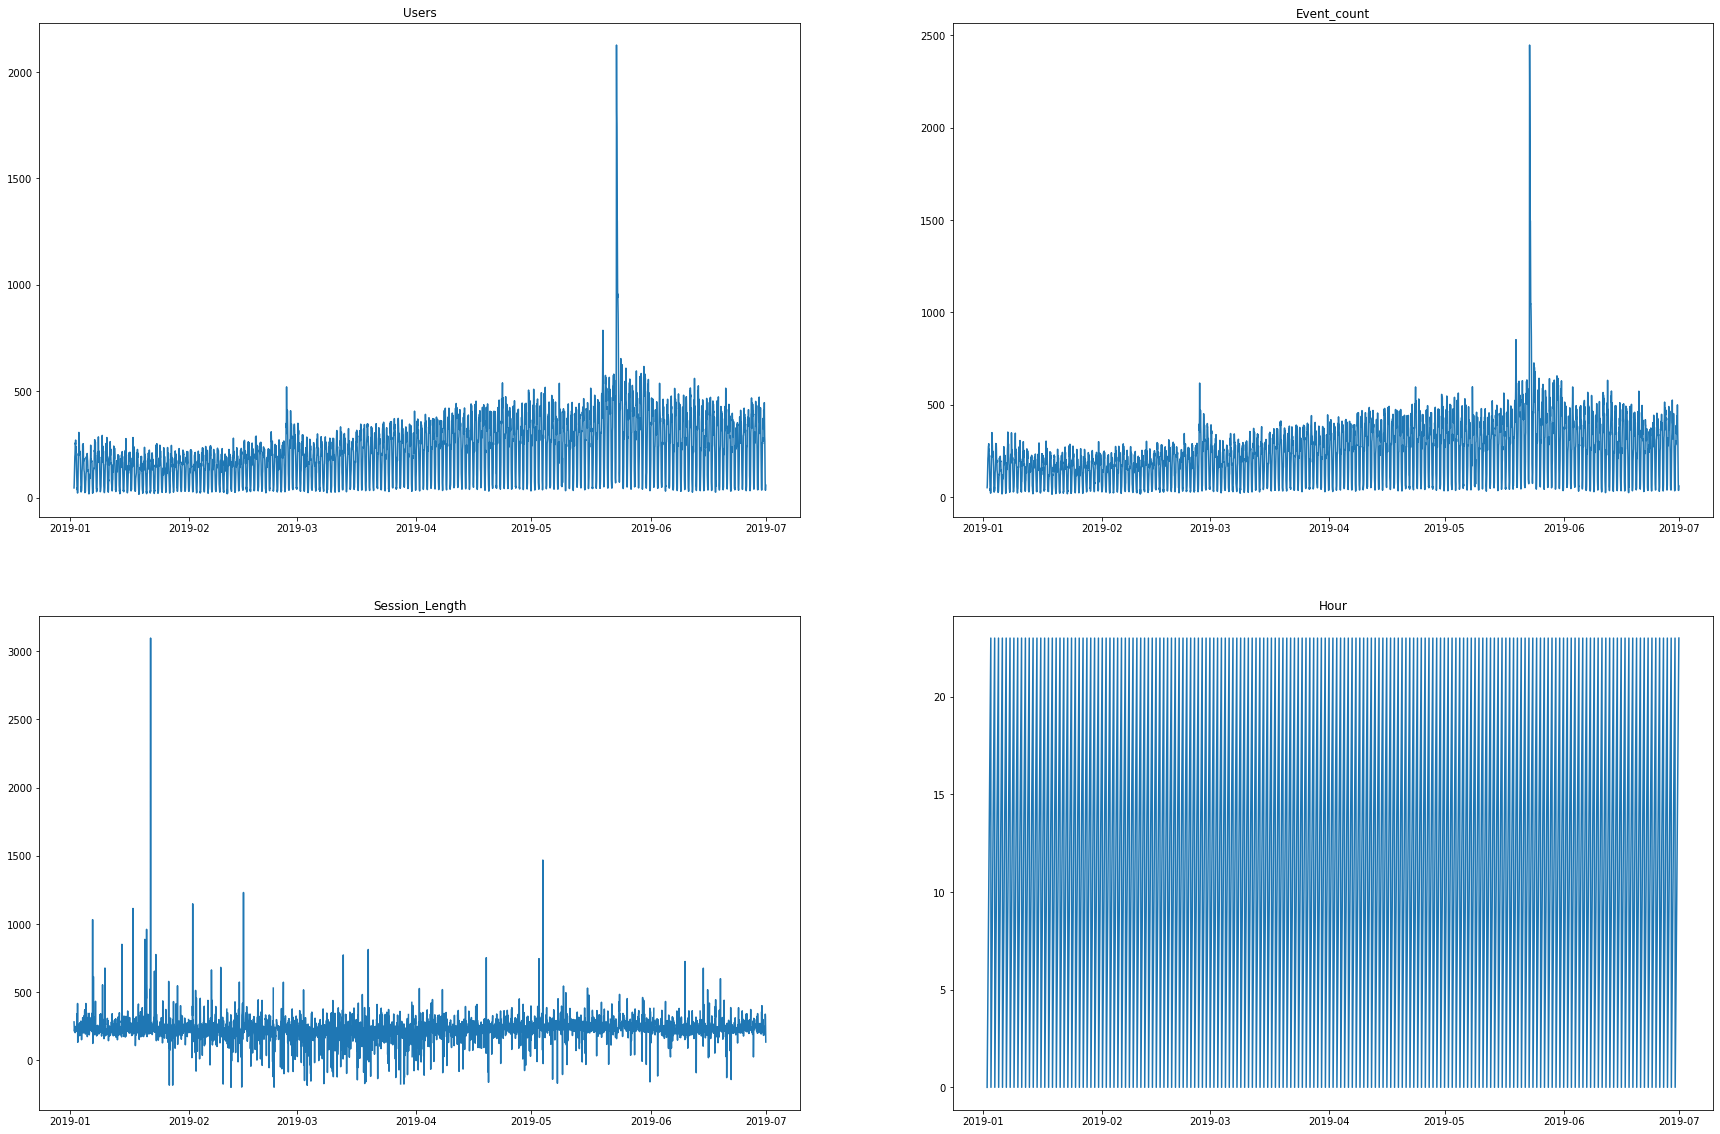

In [10]:
plt.figure(figsize = (30,20))
plt.subplot(2,2,1)
plt.plot(daily_data['users'])
plt.title("Users")
plt.subplot(2,2,2)
plt.plot(daily_data['event_count'])
plt.title("Event_count")
plt.subplot(2,2,3)
plt.plot(daily_data[' sessionLength'])
plt.title("Session_Length")
plt.subplot(2,2,4)
plt.plot(daily_data['hour'])
plt.title("Hour")

In [11]:
from fbprophet import Prophet
import logging
logging.getLogger().setLevel(logging.ERROR)

In [12]:
dfs=df[['date',' sessionLength']]
dfs.columns=['ds','y']
dfs.head()

ds    y
0 2019-01-02 00:00:00  282
1 2019-01-02 01:00:00  254
2 2019-01-02 02:00:00  213
3 2019-01-02 03:00:00  215
4 2019-01-02 04:00:00  232

In [13]:
df1=df[['date','event_count']]
df1.columns=['ds','y']
df1.head()

ds    y
0 2019-01-02 00:00:00   52
1 2019-01-02 01:00:00   67
2 2019-01-02 02:00:00  109
3 2019-01-02 03:00:00  152
4 2019-01-02 04:00:00  185

In [46]:
df2=df[['date','users']]
df2.columns=['ds','y']
df2.head()

ds    y
0  2019-01-02   45
1  2019-01-02   62
2  2019-01-02   97
3  2019-01-02  147
4  2019-01-02  172

In [14]:
df.head()

date  hour  users   sessionLength  event_count
0 2019-01-02 00:00:00     0     45             282           52
1 2019-01-02 01:00:00     1     62             254           67
2 2019-01-02 02:00:00     2     97             213          109
3 2019-01-02 03:00:00     3    147             215          152
4 2019-01-02 04:00:00     4    172             232          185

for event_count


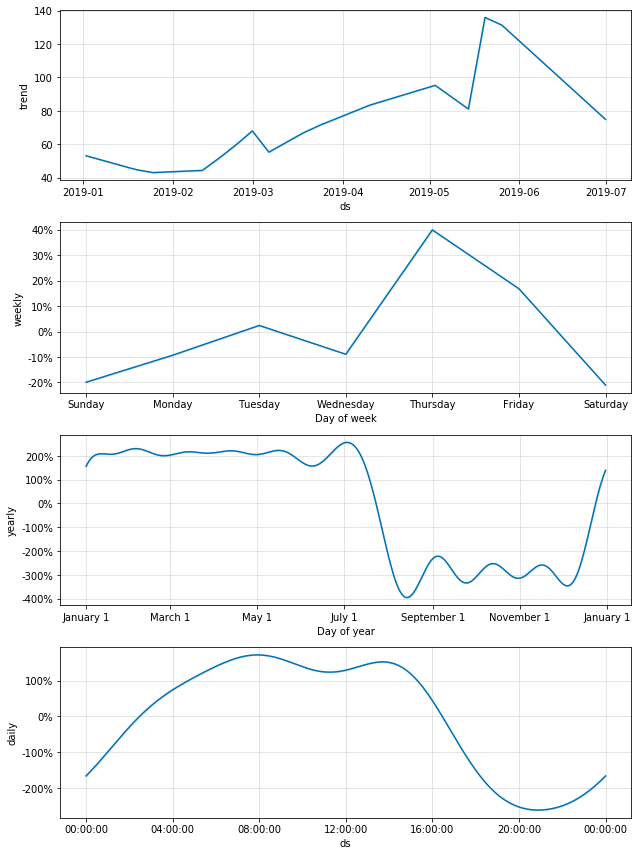

In [15]:
def fit_predict_model(df, interval_width = 0.99, changepoint_range = 0.8):
    m = Prophet(daily_seasonality = True, yearly_seasonality = True, weekly_seasonality = True,
                seasonality_mode = 'multiplicative', 
                interval_width = interval_width,
                changepoint_range = changepoint_range)
    m = m.fit(df)
    forecast = m.predict(df)
    forecast['fact'] = df['y'].reset_index(drop = True)
    m.plot_components(forecast)
    return forecast,m  
print ("for event_count")
pred,m = fit_predict_model(df1)

In [16]:
pred['fact'].head()

0     52
1     67
2    109
3    152
4    185
Name: fact, dtype: int64

for sessionlength


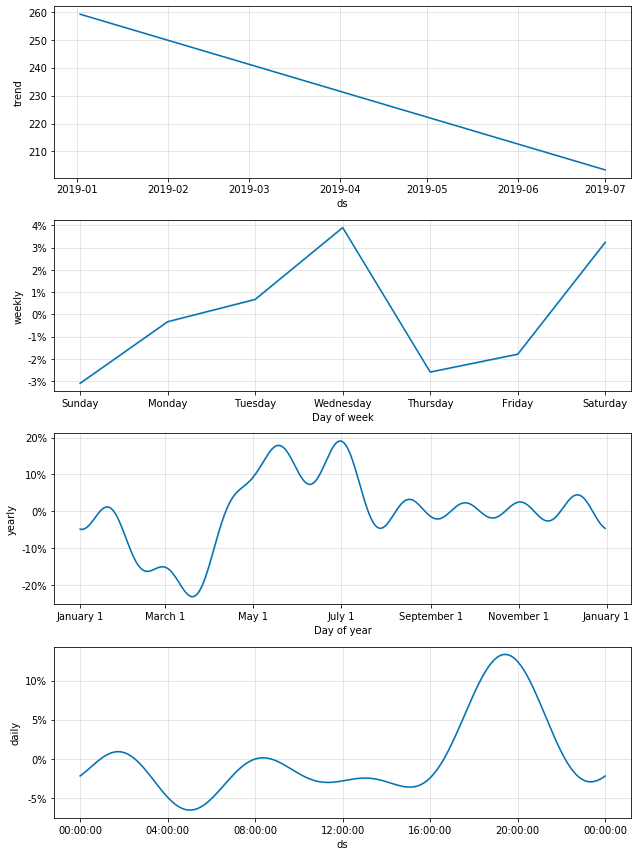

In [17]:
print ("for sessionlength")
pred1,m1 = fit_predict_model(dfs)

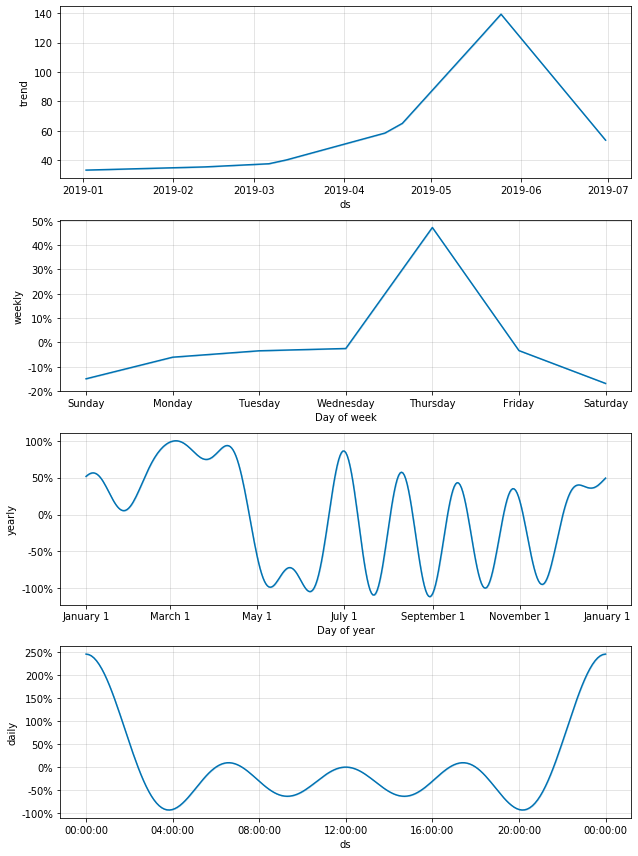

In [47]:
pred2,m2=fit_predict_model(df2)

In [18]:
def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()
    #forecast['fact'] = df['y']

    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1

    #anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
        (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
        (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
    
    return forecasted

pred = detect_anomalies(pred)
pred[pred['anomaly'] == True]

ds       trend        yhat  yhat_lower  yhat_upper  \
696  2019-01-31 00:00:00   43.587256   86.664492  -66.031759  269.783164   
1327 2019-02-26 07:00:00   64.663971  297.808651  131.340862  459.654666   
1332 2019-02-26 12:00:00   64.972718  273.845642  100.572978  451.958633   
2675 2019-04-23 11:00:00   90.363457  386.545242  212.477562  552.921293   
3030 2019-05-08 06:00:00   88.763536  402.304805  220.327746  584.601190   
3302 2019-05-19 14:00:00  129.946288  589.899951  428.824134  770.966875   
3303 2019-05-19 15:00:00  130.343095  550.623034  391.791799  717.538550   
3385 2019-05-23 01:00:00  133.696407  341.551761  162.619548  518.337247   
3386 2019-05-23 02:00:00  133.664025  435.810753  269.816107  618.594443   
3387 2019-05-23 03:00:00  133.631643  515.927846  336.331539  679.804266   
3388 2019-05-23 04:00:00  133.599261  576.394811  401.053367  752.214629   
3389 2019-05-23 05:00:00  133.566879  623.595164  448.379443  786.691469   
3390 2019-05-23 06:00:00  133.534497  664.501506  491.814410  824.355663   
3391 2019-05-23 07:00:00  133.502115  695.865039  534.568222  869.656011   
3392 2019-05-23 08:00:00  133.469732  706.331019  529.534066  881.121280   
3393 2019-05-23 09:00:00  133.437350  690.481144  514.415708  872.817115   
3394 2019-05-23 10:00:00  133.404968  660.184680  484.531177  821.496128   
3395 2019-05-23 11:00:00  133.372586  639.377597  472.154942  817.182270   
3396 2019-05-23 12:00:00  133.340204  644.004439  474.317158  815.814952   
3397 2019-05-23 13:00:00  133.307822  664.555964  485.584458  842.629259   
3398 2019-05-23 14:00:00  133.275440  668.543958  483.099486  850.021340   
3874 2019-06-12 10:00:00  104.046952  425.891656  247.011159  591.465133   

      fact  anomaly  importance  
696    301        1    0.103710  
1327   618        1    0.256222  
1332   471        1    0.040428  
2675   597        1    0.073834  
3030   598        1    0.022406  
3302   853        1    0.096170  
3303   809        1    0.113055  
3385   548        1    0.054129  
3386  1072        1    0.422953  
3387  2447        1    0.722189  
3388  2110        1    0.643500  
3389  2006        1    0.607831  
3390  1750        1    0.528940  
3391  1496        1    0.418679  
3392  1496        1    0.411015  
3393  1225        1    0.287496  
3394  1045        1    0.213879  
3395  1046        1    0.218755  
3396  1016        1    0.197033  
3397   958        1    0.120429  
3398   872        1    0.025205  
3874   633        1    0.065616

In [19]:
pred1 = detect_anomalies(pred1)
pred1[pred1['anomaly']==True]

ds       trend        yhat  yhat_lower  yhat_upper  \
116  2019-01-06 20:00:00  257.661974  276.591467  -14.231554  583.624304   
121  2019-01-07 01:00:00  257.597436  246.921928  -95.917382  541.108369   
193  2019-01-10 01:00:00  256.668087  242.517415  -82.180667  547.798673   
299  2019-01-14 11:00:00  255.299874  247.753174  -74.658356  539.954810   
368  2019-01-17 08:00:00  254.409239  244.472658  -36.547071  562.629765   
442  2019-01-20 10:00:00  253.454064  244.778149  -95.595708  562.448145   
453  2019-01-20 21:00:00  253.312078  272.596486  -33.913625  621.454429   
478  2019-01-21 22:00:00  252.989382  259.079717  -87.419127  603.770603   
502  2019-01-22 22:00:00  252.679595  266.392896  -47.266830  588.678447   
511  2019-01-23 07:00:00  252.563424  257.364907  -69.627290  619.109292   
591  2019-01-26 15:00:00  251.530796  236.481095  -58.907953  518.023036   
741  2019-02-01 21:00:00  249.594609  259.487129  -66.657200  586.131813   
858  2019-02-06 18:00:00  248.084383  239.093532  -96.322471  563.554504   
916  2019-02-09 04:00:00  247.335723  207.135239  -95.019307  495.229736   
1032 2019-02-14 00:00:00  245.838403  194.832856 -120.458768  540.829184   
1058 2019-02-15 02:00:00  245.502797  205.365345 -111.581113  504.840177   
1307 2019-02-25 11:00:00  242.288719  199.227149  -74.170158  547.074437   
1681 2019-03-13 01:00:00  237.461131  198.083863 -139.340469  539.349972   
1837 2019-03-19 13:00:00  235.447462  181.110500 -123.512373  499.602022   
2574 2019-04-19 06:00:00  225.934144  226.698026  -75.455139  545.208212   
2903 2019-05-02 23:00:00  221.687285  233.127334 -106.852893  544.764149   
2927 2019-05-03 23:00:00  221.377483  246.386626  -50.343848  561.193874   
3815 2019-06-09 23:00:00  209.914974  218.545261 -118.262870  554.465763   
3929 2019-06-14 17:00:00  208.443444  238.373102  -81.826862  555.047352   
4036 2019-06-19 04:00:00  207.062272  229.584396  -80.875244  569.210133   

      fact  anomaly  importance  
116   1032        1    0.434473  
121    614        1    0.118716  
193    677        1    0.190844  
299    851        1    0.365506  
368   1114        1    0.494946  
442    887        1    0.365898  
453    961        1    0.353325  
478   3097        1    0.805047  
502    654        1    0.099880  
511    776        1    0.202179  
591    579        1    0.105314  
741   1148        1    0.489432  
858    663        1    0.149993  
916    682        1    0.273857  
1032   574        1    0.057789  
1058  1231        1    0.589894  
1307   573        1    0.045245  
1681   773        1    0.302264  
1837   813        1    0.385483  
2574   753        1    0.275952  
2903   746        1    0.269753  
2927  1469        1    0.617976  
3815   725        1    0.235220  
3929   676        1    0.178924  
4036   599        1    0.049733

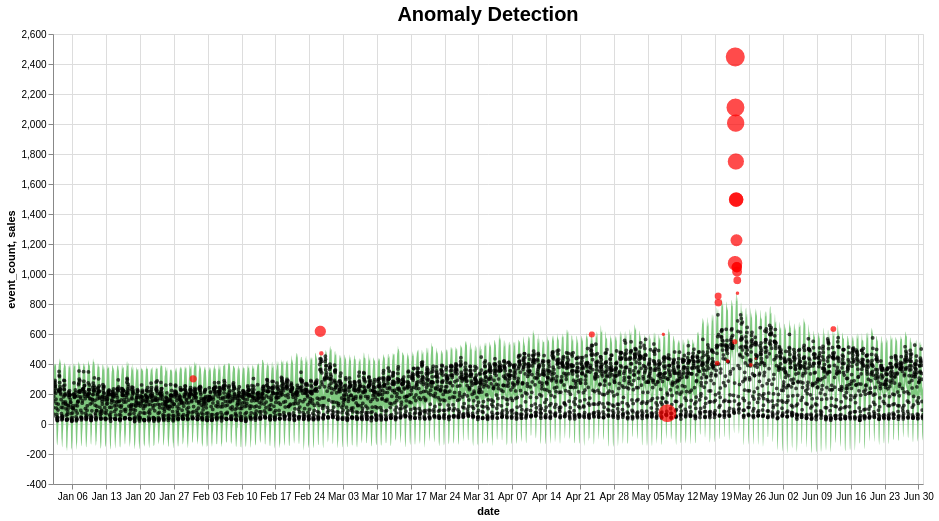

In [20]:
def plot_anomalies(forecasted):
    interval = alt.Chart(forecasted).mark_area(interpolate="basis", color = '#7FC97F').encode(
    x=alt.X('ds:T',  title ='date'),
    y='yhat_upper',
    y2='yhat_lower',
    tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive().properties(
        title='Anomaly Detection'
    )

    fact = alt.Chart(forecasted[forecasted.anomaly==0]).mark_circle(size=15, opacity=0.7, color = 'Black').encode(
        x='ds:T',
        y=alt.Y('fact', title='event_count'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive()

    anomalies = alt.Chart(forecasted[forecasted.anomaly!=0]).mark_circle(size=30, color = 'Red').encode(
        x='ds:T',
        y=alt.Y('fact', title='sales'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper'],
        size = alt.Size( 'importance', legend=None)
    ).interactive()

    return alt.layer(interval, fact, anomalies)\
              .properties(width=870, height=450)\
              .configure_title(fontSize=20)             
plot_anomalies(pred)

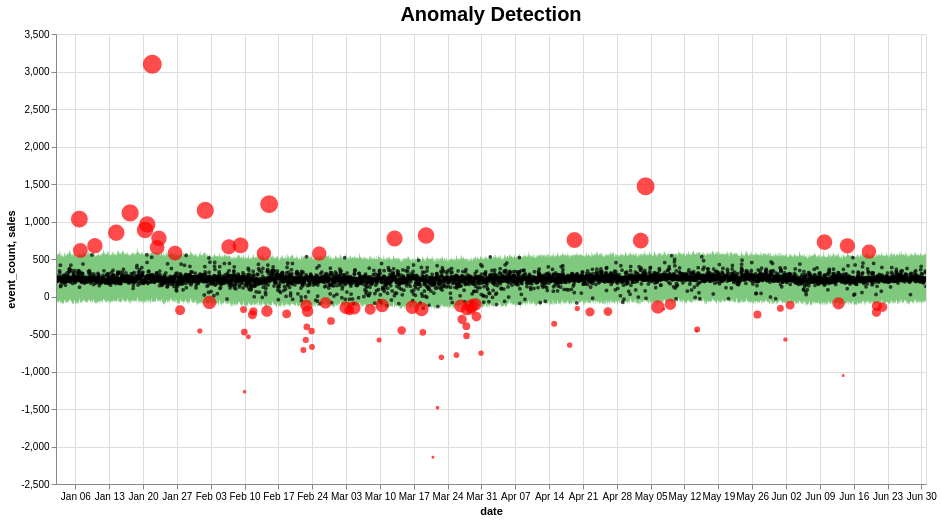

In [21]:
plot_anomalies(pred1)

In [22]:
df2 = pd.DataFrame({'ds':[pd.Timestamp(2020, 1, 1, 12),pd.Timestamp(2020, 1, 1, 15)]}) #generate data as json

In [48]:
future1 = m.make_future_dataframe(periods=365)
future2 = m1.make_future_dataframe(periods=365)
future3 = m2.make_future_dataframe(periods=365)
future1.head()

ds
0 2019-01-02 00:00:00
1 2019-01-02 01:00:00
2 2019-01-02 02:00:00
3 2019-01-02 03:00:00
4 2019-01-02 04:00:00

In [49]:
future_datae= m.predict(future1)
future_datas= m1.predict(future2)
future_datau = m2.predict(future3)
future_datae.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  \
0 2019-01-02 00:00:00  53.213531 -135.769463  206.122327    53.213531   
1 2019-01-02 01:00:00  53.193331  -82.073294  244.784715    53.193331   
2 2019-01-02 02:00:00  53.173130  -41.877642  286.136981    53.173130   
3 2019-01-02 03:00:00  53.152929  -27.159843  329.221855    53.152929   
4 2019-01-02 04:00:00  53.132729    7.964264  361.163171    53.132729   

   trend_upper     daily  daily_lower  daily_upper  multiplicative_terms  ...  \
0    53.213531 -1.663999    -1.663999    -1.663999             -0.132177  ...   
1    53.193331 -0.992417    -0.992417    -0.992417              0.554817  ...   
2    53.173130 -0.297042    -0.297042    -0.297042              1.267344  ...   
3    53.152929  0.294964     0.294964     0.294964              1.878191  ...   
4    53.132729  0.742377     0.742377     0.742377              2.346069  ...   

     weekly  weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0 -0.089265     -0.089265     -0.089265  1.621087      1.621087      1.621087   
1 -0.078646     -0.078646     -0.078646  1.625881      1.625881      1.625881   
2 -0.066260     -0.066260     -0.066260  1.630646      1.630646      1.630646   
3 -0.052154     -0.052154     -0.052154  1.635381      1.635381      1.635381   
4 -0.036394     -0.036394     -0.036394  1.640087      1.640087      1.640087   

   additive_terms  additive_terms_lower  additive_terms_upper        yhat  
0             0.0                   0.0                   0.0   46.179919  
1             0.0                   0.0                   0.0   82.705918  
2             0.0                   0.0                   0.0  120.561765  
3             0.0                   0.0                   0.0  152.984257  
4             0.0                   0.0                   0.0  177.785797  

[5 rows x 22 columns]

In [50]:
future_df=pd.DataFrame()
future_df['ds']=future1['ds']
future_df['event_count']=future_datae['yhat']
future_df['sessionLength']=future_datas['yhat']
future_df['users']=future_datau['yhat']
future_df

ds  event_count  sessionLength        users
0    2019-01-02 00:00:00    46.179919     250.848293   132.056930
1    2019-01-02 01:00:00    82.705918     256.825783   132.056930
2    2019-01-02 02:00:00   120.561765     258.516172   132.056930
3    2019-01-02 03:00:00   152.984257     252.460738   132.056930
4    2019-01-02 04:00:00   177.785797     243.294119   132.056930
5    2019-01-02 05:00:00   197.506718     238.735872   132.056930
6    2019-01-02 06:00:00   214.918172     242.101614   132.056930
7    2019-01-02 07:00:00   228.724430     249.546551   132.056930
8    2019-01-02 08:00:00   234.406587     254.245530   132.056930
9    2019-01-02 09:00:00   229.805706     252.899903   132.056930
10   2019-01-02 10:00:00   219.631909     248.082434   132.056930
11   2019-01-02 11:00:00   213.385401     244.581554   132.056930
12   2019-01-02 12:00:00   217.384922     244.113033   132.056930
13   2019-01-02 13:00:00   227.833905     244.162918   132.056930
14   2019-01-02 14:00:00   231.810516     242.020549   132.056930
15   2019-01-02 15:00:00   216.327427     239.279219   132.056930
16   2019-01-02 16:00:00   178.290616     241.356444   132.056930
17   2019-01-02 17:00:00   127.171210     251.816933   132.056930
18   2019-01-02 18:00:00    78.502174     267.129324   132.056930
19   2019-01-02 19:00:00    44.077276     277.765430   132.056930
20   2019-01-02 20:00:00    26.874741     275.597986   132.056930
21   2019-01-02 21:00:00    23.651154     261.111518   132.056930
22   2019-01-02 22:00:00    31.055978     243.531161   132.056930
23   2019-01-02 23:00:00    48.755834     233.329569   132.056930
24   2019-01-03 00:00:00    77.184503     233.722774   149.383163
25   2019-01-03 01:00:00   113.491657     238.793403   149.383163
26   2019-01-03 02:00:00   150.917466     239.710493   149.383163
27   2019-01-03 03:00:00   182.757716     233.030525   149.383163
28   2019-01-03 04:00:00   206.844116     223.392350   149.383163
29   2019-01-03 05:00:00   225.695164     218.514604   149.383163
...                  ...          ...            ...          ...
4655 2020-05-31 23:00:00  -202.126342     106.705465 -1808.110661
4656 2020-06-01 23:00:00  -246.556659     106.738874 -1853.676830
4657 2020-06-02 23:00:00  -173.313121     108.990282 -1853.674474
4658 2020-06-03 23:00:00  -380.640089     102.091316 -1843.177734
4659 2020-06-04 23:00:00  -283.783291     101.329012 -2204.881128
4660 2020-06-05 23:00:00   -91.332446     106.071620 -1813.654392
4661 2020-06-06 23:00:00   -90.710158      99.230280 -1708.227873
4662 2020-06-07 23:00:00  -132.339768     101.196962 -1726.892873
4663 2020-06-08 23:00:00  -196.299416     101.853574 -1807.495946
4664 2020-06-09 23:00:00  -141.416869     104.738097 -1850.034029
4665 2020-06-10 23:00:00  -375.192856      98.717698 -1889.687432
4666 2020-06-11 23:00:00  -298.419258      98.727682 -2316.642841
4667 2020-06-12 23:00:00  -124.342189     104.132670 -1979.754642
4668 2020-06-13 23:00:00  -146.833750      98.206157 -1939.244106
4669 2020-06-14 23:00:00  -212.306078     100.870649 -2028.186751
4670 2020-06-15 23:00:00  -299.941474     102.216376 -2181.271450
4671 2020-06-16 23:00:00  -264.833187     105.686455 -2294.422831
4672 2020-06-17 23:00:00  -523.689427     100.383858 -2401.641289
4673 2020-06-18 23:00:00  -462.853336     100.894889 -2899.576312
4674 2020-06-19 23:00:00  -300.284242     106.585660 -2610.331219
4675 2020-06-20 23:00:00  -336.408643     101.099414 -2615.205757
4676 2020-06-21 23:00:00  -413.775686     103.898698 -2741.991819
4677 2020-06-22 23:00:00  -510.857600     105.293464 -2922.509563
4678 2020-06-23 23:00:00  -479.229945     108.645005 -3049.259644
4679 2020-06-24 23:00:00  -745.049284     103.306495 -3156.062823
4680 2020-06-25 23:00:00  -680.467693     103.530661 -3647.366214
4681 2020-06-26 23:00:00  -508.424927     108.701238 -3320.164290
4682 2020-06-27 23:00:00  -536.171666     102.847692 -3278.748553
4683 2020-06-28 23:00:00  -602.659928     104.989079 -3347.766